## 1. Problem Framing
Predict a person's **salary** based on **years of experience**.
 
- Input (X): Years of Experience
- Output (Y): Salary
- Type: Supervised Learning (Regression)

In [18]:

 
import numpy as np
 
# Input data: Years of Experience
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
 
# Output data: Salary
y = np.array([25000, 30000, 35000, 45000, 50000])
 
X, y
 

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([25000, 30000, 35000, 45000, 50000]))

In [19]:

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
 
X_train, X_test
 

(array([[5],
        [3],
        [1],
        [4]]),
 array([[2]]))

In [20]:
 
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)
 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
 

Slope (m): 6428.571428571427
Intercept (c): 17857.142857142862


In [21]:
y_pred = model.predict(X_test)
y_pred

array([30714.28571429])

In [22]:
new_experience = np.array([[6]])
predicted_salary = model.predict(new_experience)
 
print("Predicted salary for 6 years experience:", predicted_salary[0])

Predicted salary for 6 years experience: 56428.57142857142


In [23]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
 

Mean Squared Error: 510204.0816326575


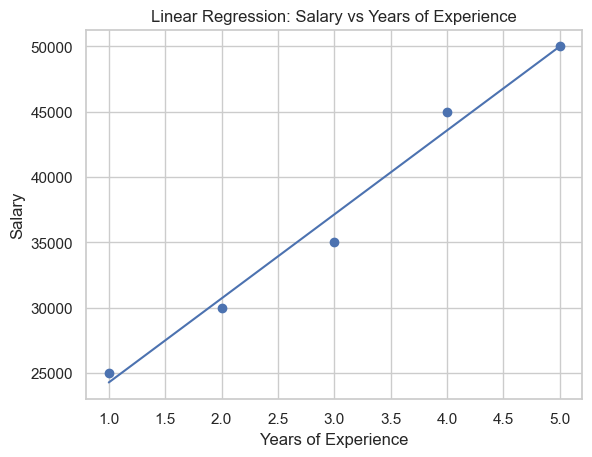

In [24]:

import matplotlib.pyplot as plt
import numpy as np
 
# Create smooth values for X-axis (for straight line)
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
 
# Predict salary for the line
y_line = model.predict(X_line)
 
# Plot actual data points
plt.figure()
plt.scatter(X, y)
 
# Plot regression line
plt.plot(X_line, y_line)
 
# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Years of Experience")
 
# Show plot
plt.show()
 
 

In [25]:
import pandas as pd
data=pd.read_csv(r"C:\Users\sunia\OneDrive\Desktop\Machine Learining\Salary_Data.csv")
print(data)


    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


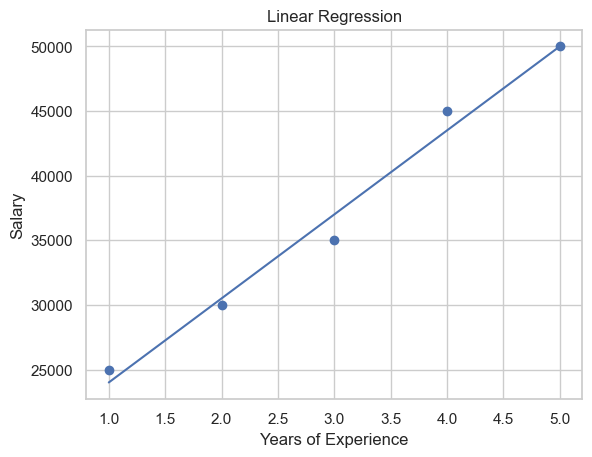

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression")
plt.show()


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style='whitegrid')


path = r'C:\Users\sunia\OneDrive\Desktop\Machine Learining\50_Startups.csv'

dataset = pd.read_csv(path)
print('Dataset shape:', dataset.shape)
display(dataset.head())


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print('\nFeature preview (first 5 rows):')
print(X[:5])


ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [3])],
    remainder='passthrough'
)

X = ct.fit_transform(X)

print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])


Dataset shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94



Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]

After OneHotEncoding, feature shape: (50, 5)

First 5 rows after encoding:
[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]]


In [28]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Training samples: 40
Test samples: 10
Intercept: 42554.16761772438
Number of coefficients: 5


In [29]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


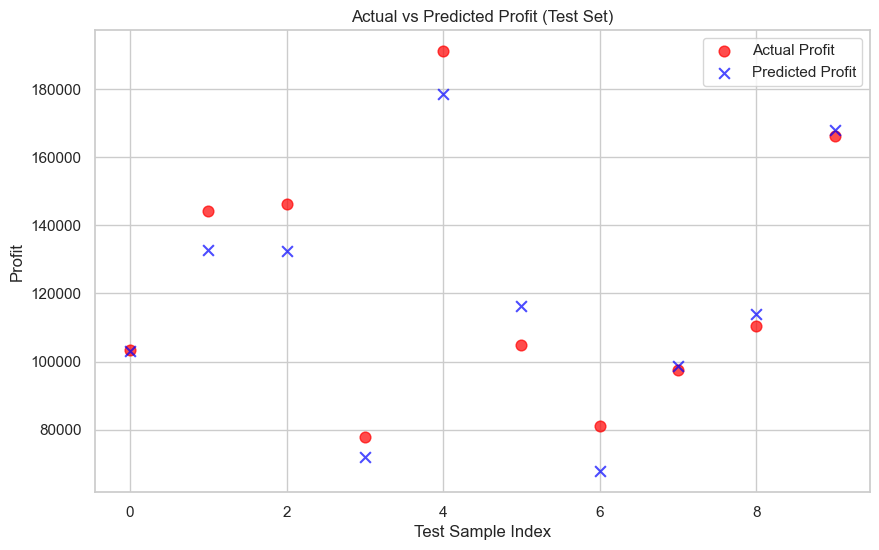

In [30]:
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

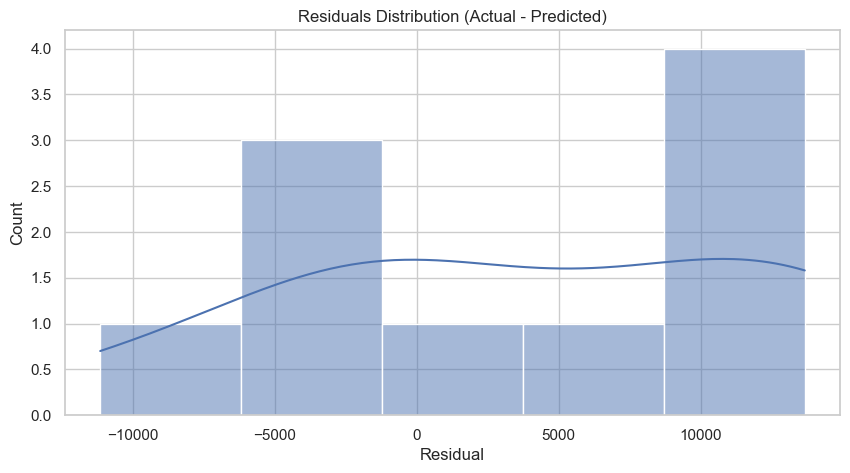

In [31]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()

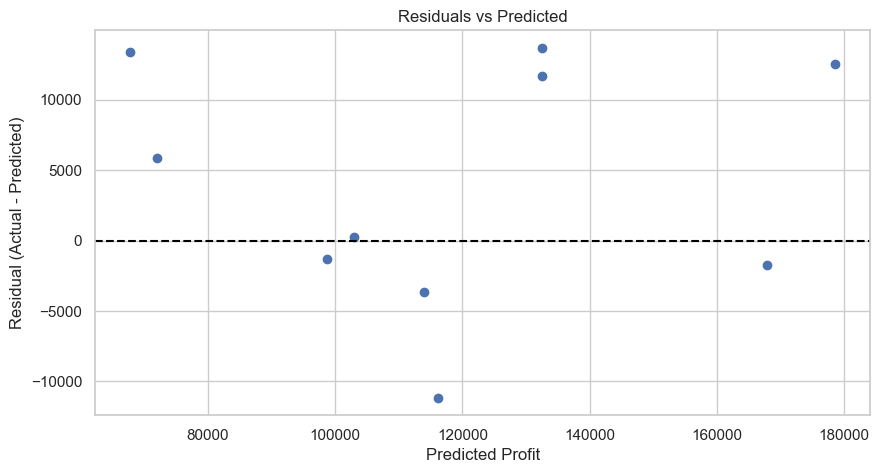

In [32]:
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [33]:
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347


In [34]:

# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))
 
 


Sample startup predicted profit: 181566.92389384913


# 📊 Advertising Sales Prediction – Business Analysis

## 📁 Dataset (Kaggle)
- **Dataset Name:** Advertising Dataset  
- 🔗 **Link:** https://www.kaggle.com/datasets/ashydv/advertising-dataset

---

## 🏢 Business Scenario

A consumer goods company promotes its product using multiple advertising channels:

- **Television (TV)**
- **Radio**
- **Newspaper**

The company wants to understand:

> **“How do different advertising channels together influence product sales?”**

They also want to **predict future sales** based on planned advertising budgets.

You are appointed as a **Data Analyst** to analyze the data and build a **predictive model**.

---

## 📝 Tasks

1. **Load the dataset** and examine the available columns.

2. **Select input features**
   - TV advertising spend
   - Radio advertising spend
   - Newspaper advertising spend

3. **Select target variable**
   - Sales

4. **Build a predictive model** that learns the relationship between advertising spends and sales.

5. **Train the model** using historical data.

6. **Predict sales** for unseen data points.

7. **Predict sales** when the advertising budget is:
   - TV = **150**
   - Radio = **20**
   - Newspaper = **30**

8. **Evaluate the model’s prediction error**.

9. **Interpret the model coefficients**
   - Which advertising medium has the **strongest impact** on sales?
   - Which advertising medium has the **least impact** on sales?

10. **Visualize**
    - Actual sales vs predicted sales

11. **Based on your analysis, suggest**
    - One **business recommendation** to improve sales
    - One **technical improvement** to improve prediction accuracy


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(style='whitegrid')

# Load dataset
path = r"C:\Users\sunia\OneDrive\Desktop\Machine Learining\advertising.csv"
dataset = pd.read_csv(path)

print('Dataset shape:', dataset.shape)
display(dataset.head())

# Separate features and target
X = dataset.iloc[:, :-1].values   # TV, Radio, Newspaper
y = dataset.iloc[:, -1].values    # Sales

print("\nX shape:", X.shape)
print("y shape:", y.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Output coefficients
print("\nCoefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Compare actual vs predicted
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
display(results.head())

Dataset shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



X shape: (200, 3)
y shape: (200,)

Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


,Actual,Predicted
0,16.9,17.034772
1,22.4,20.409740
2,21.4,23.723989
3,7.3,9.272785
4,24.7,21.682719


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

# Train the Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Model parameters
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
print('Coefficients:', regressor.coef_)


Training samples: 160
Test samples: 40
Intercept: 4.77320520326983
Number of coefficients: 3
Coefficients: [ 0.05368006  0.11152624 -0.00351166]


In [47]:
import numpy as np
import pandas as pd

# Predicting Test set results
y_pred = regressor.predict(X_test)

# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': np.round(y_pred, 2)
})

display(comparison.reset_index(drop=True))


,Actual Sales,Predicted Sales
0,11.3,10.71
1,8.4,8.69
2,12.0,9.58
3,25.4,24.86
4,16.7,14.66
5,8.7,8.32
6,7.2,10.43
7,18.2,18.45
8,9.2,9.73
9,16.6,17.93


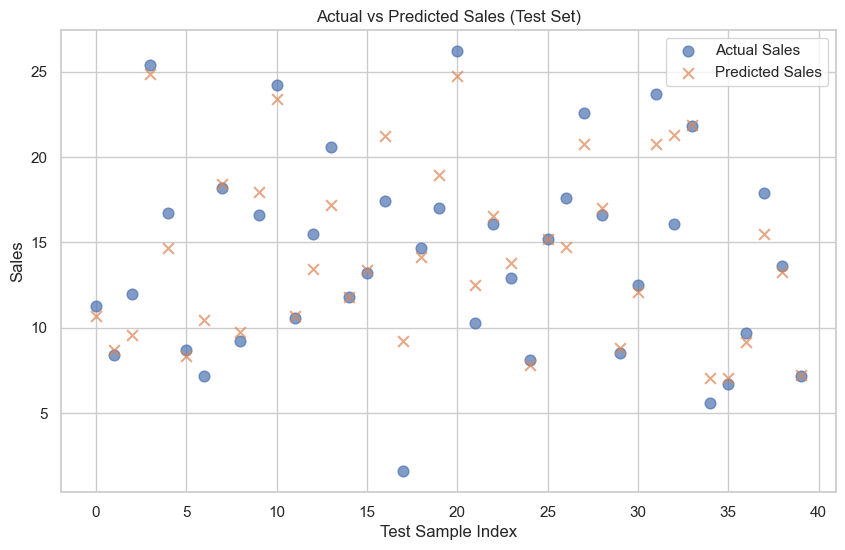

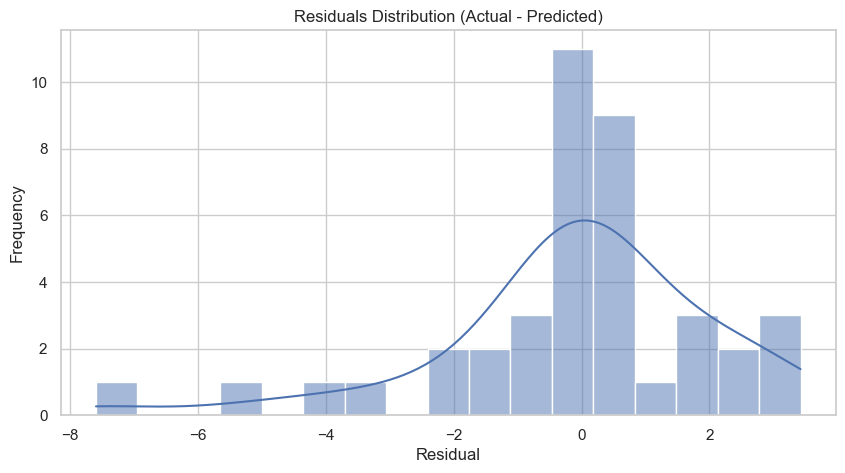

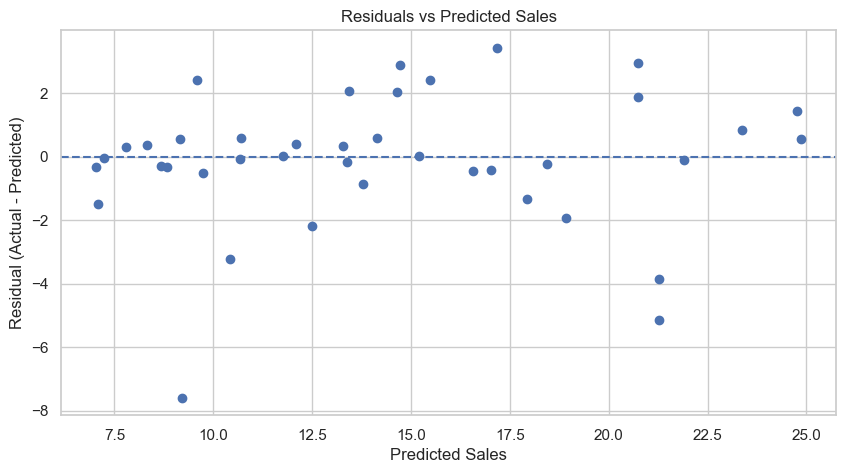

In [48]:
# 4) Visualization - Code

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Actual vs Predicted Sales (scatter)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Sales', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Residuals
residuals = y_test - y_pred

# Residuals distribution
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Residuals vs Predicted (check heteroscedasticity)
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, linestyle='--')
plt.title('Residuals vs Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

### 📊 Medical Insurance Cost Analysis (Multiple Linear Regression)

### 📁 Dataset
**Medical Insurance Cost Dataset (Kaggle)**  
🔗 https://www.kaggle.com/datasets/mirichoi0218/insurance

---

### 🏥 Business Scenario
You are working as a **Data Analyst** for a health insurance company.

The company provides insurance policies to thousands of customers every year. Recently, management observed that **insurance claim costs are increasing**, but they are unsure which **customer factors** are driving these costs the most.

---

### 🎯 Business Goal
The company wants to:

- Identify the **key factors** that increase medical insurance charges  
- Design **risk-based premium plans**
- Reduce losses caused by **high-risk customers**
- Create **fair pricing strategies** for customers

Your task is to use **Multiple Linear Regression** to support these decisions.

---

### 📁 Dataset Reality (Messy Data)
The dataset contains real-world challenges:

- Some important columns are **categorical (non-numeric)**
- Certain customer attributes are **text-based**
- One column represents **geographical regions**
- Numerical features have **very different value ranges**
- Some variables may be **strongly correlated**
- The data **cannot be used directly** for regression

---

### 🧩 Assignment Tasks

### ✅ Task 1 — Business Understanding
Identify:
- The **target variable** (company’s financial concern)
- The **input variables** related to customer risk  

Explain how your regression model helps the company:
- Control rising costs  
- Not just predict them

---

### ✅ Task 2 — Data Inspection
Explore the dataset and:
- Separate **numeric** and **categorical** columns
- Identify columns **not directly usable** in regression
- Report any **data quality issues** observed

---

### ✅ Task 3 — Data Cleaning & Encoding
Convert categorical variables into numeric form.

Decide how to handle:
- **Region** information
- **Binary attributes** (e.g., lifestyle indicators)

Justify each transformation from both:
- A **business** perspective
- A **modeling** perspective

---

### ✅ Task 4 — Feature Scaling & Comparability
- Observe differences in value ranges among numeric features
- Explain why **scaling** is important when comparing regression coefficients
- Prepare the data so each variable’s effect can be **fairly interpreted**

---

### ⚠️ Task 5 — The Hidden Trap (Multicollinearity)
- Analyze relationships between independent variables
- Identify **highly correlated features**  
  *(e.g., age, BMI, lifestyle habits)*

Explain:
- Why multicollinearity is a problem in **Multiple Linear Regression**
- How it can confuse **business decision-making**

Take appropriate steps to **fix the issue**.

---

### ✅ Task 6 — Build the Multiple Linear Regression Model
Build a Multiple Linear Regression model using the prepared dataset.

Ensure the model is:
- **Interpretable**
- **Stable**
- Suitable for explaining **customer cost behavior**

---

### ✅ Task 7 — Model Evaluation
- Evaluate model performance using appropriate **regression metrics**
- Comment on whether the model is **reliable enough** to support pricing decisions

---

### 🔗 Dataset Reference
https://www.kaggle.com/datasets/mirichoi0218/insurance


In [56]:
import pandas as pd
import numpy as np

# Load dataset
path = r"C:\Users\sunia\OneDrive\Desktop\Machine Learining\insurance.csv"
df = pd.read_csv(path)

# Target variable (company cost)
y = df['charges']

# Input variables (customer attributes)
X = df.drop('charges', axis=1)

print("Target Variable:", y.name)
print("Input Features:", list(X.columns))



# Dataset overview
df.info()

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())



Target Variable: charges
Input Features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Numeric Columns: ['age', 'bmi', 'children', 'charges']
Categorical Columns: ['sex', 'smoker', 'region']


In [57]:

# Encode binary categorical columns
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# One-hot encode region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

df.head()





,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Intercept:", regressor.intercept_)
print("Number of Coefficients:", len(regressor.coef_))



Intercept: 13314.335941867355
Number of Coefficients: 8


In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 33596915.85
RMSE: 5796.28
R² Score: 0.7836


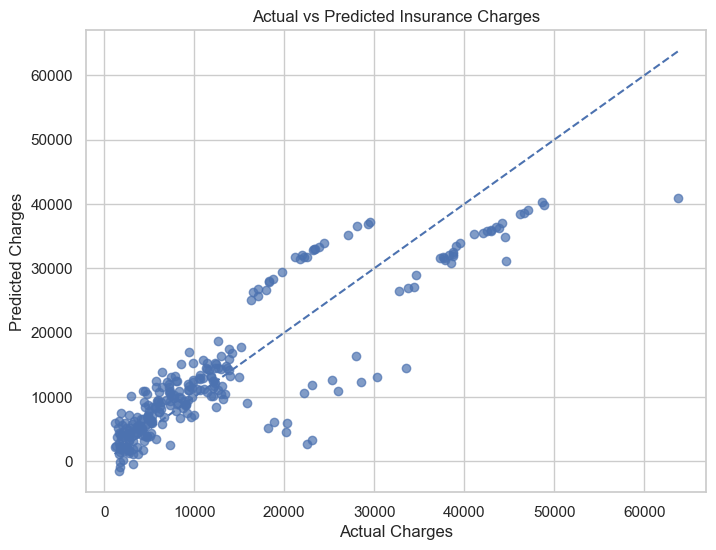

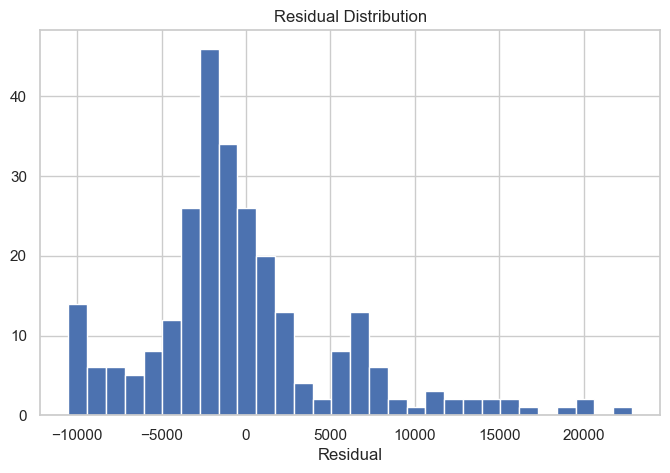

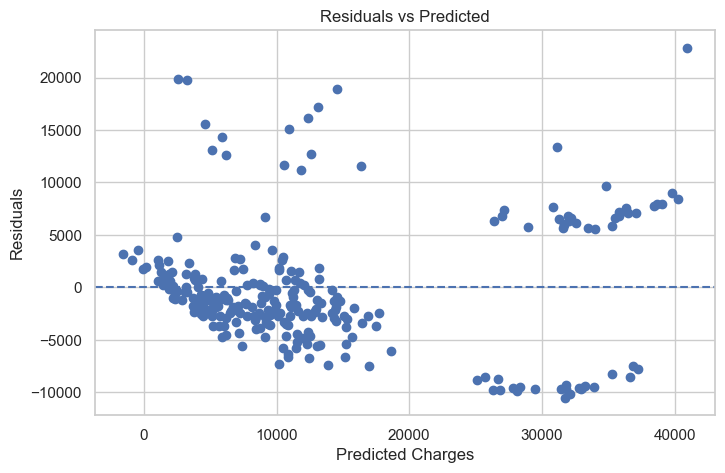

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.title("Residual Distribution")
plt.show()
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()